In [1]:
import os
import numpy as np
import math
import torch
import torch.nn as nn
from torch.autograd import Variable
import torch.utils.data as Data
from matplotlib import pyplot as plt
import scipy.io
import glob
import SRModels as model

## Declare network

In [2]:
#Declare Networks
shallow_cnn = model.Shallow()
print(shallow_cnn)  # net architecture
shallow_cnn.restore_netparam(150)
shallow_cnn.cuda()

deep_cnn = model.Deep()
print(deep_cnn)  # net architecture
deep_cnn.restore_netparam(135)
deep_cnn.cuda()

val = torch.utils.data.DataLoader(
        model.myImageFloder(mode = 1),
            batch_size= 1, 
            shuffle= False, 
            num_workers=1, 
            drop_last = False)



Shallow(
  (input): Sequential(
    (0): Conv2d(4, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): LeakyReLU(negative_slope=0.01)
  )
  (layers): Sequential(
    (0): Conv2d(64, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): LeakyReLU(negative_slope=0.01)
  )
  (output): Sequential(
    (0): Conv2d(32, 1, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  )
)
Shallow network model is restored!!
Deep(
  (input): Sequential(
    (0): Conv2d(4, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): LeakyReLU(negative_slope=0.01)
  )
  (layers): Sequential(
    (0): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): LeakyReLU(negative_slope=0.01)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): LeakyReLU(negative_slope=0.01)
    (4): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (5): LeakyReLU(negative_slope=0.01)
    (6): Conv2d(64, 64, kernel_size=(3, 3), stride=

## Show inputs

torch.Size([5, 192, 192])


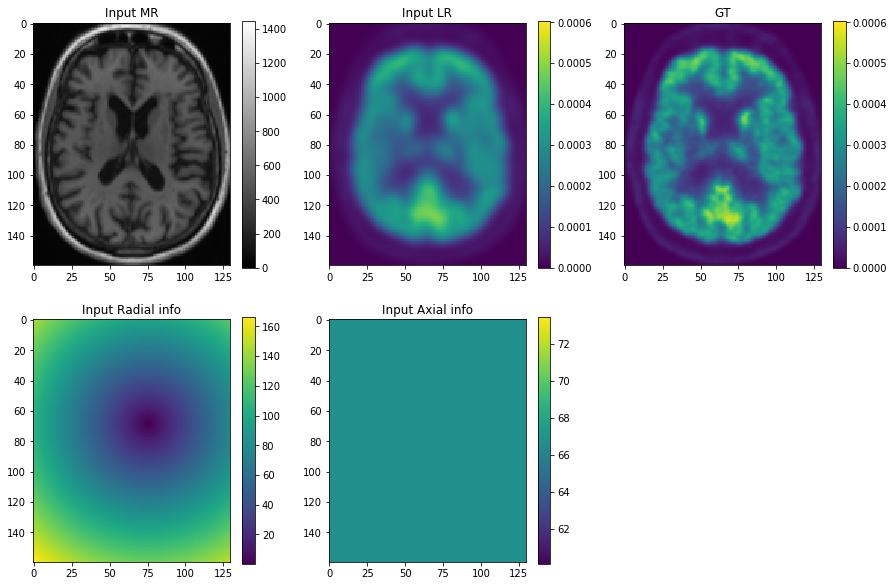

In [3]:
X, pmax, mmax, _ = val.dataset.__getitem__(0)
print(X.size())

plt.figure(figsize=(15,10))
plt.subplot(2,3,1)
plt.imshow(np.rot90(np.squeeze(X[1,20:150,5:165].numpy())* mmax,1), cmap='gray', vmin=0, vmax=mmax)
plt.title('Input MR')
plt.colorbar()
plt.subplot(2,3,2)
plt.imshow(np.rot90(np.squeeze(X[0,20:150,5:165].numpy())*pmax,1), cmap='viridis', vmin=0, vmax=pmax)
plt.title('Input LR')
plt.colorbar()
plt.subplot(2,3,3)
plt.imshow(np.rot90(np.squeeze(X[4,20:150,5:165].numpy())*pmax,1), cmap='viridis', vmin=0, vmax=pmax)
plt.title('GT')
plt.colorbar()
plt.subplot(2,3,4)
plt.imshow(np.rot90(np.squeeze(X[2,20:150,5:165].numpy())*255,1), cmap='viridis')
plt.title('Input Radial info')
plt.colorbar()
plt.subplot(2,3,5)
plt.title('Input Axial info')
plt.imshow(np.rot90(np.squeeze(X[3,20:150,5:165].numpy())*128,1), cmap='viridis')
plt.colorbar()


## Predict

In [4]:
# Salloe SR 
in_ch = 4 # input channel is 
for step, (x, pmax, mmax, name) in enumerate(val):

    with torch.no_grad():
        #print x.size()
        temp_x = x.size()[2]
        temp_y = x.size()[3]


        out = torch.FloatTensor(1, in_ch, temp_x, temp_y)
        out1 = torch.FloatTensor(1, 1, temp_x, temp_y)
        out[:,:,:,:] =  x[:,:in_ch,:,:]

        v_input = Variable(out.cuda())
        shallow_SR = shallow_cnn(v_input)
        deep_SR = deep_cnn(v_input)
        #print(s_output.size())

NameError: name 'in_ch' is not defined

## Results

NameError: name 'shallow_SR' is not defined

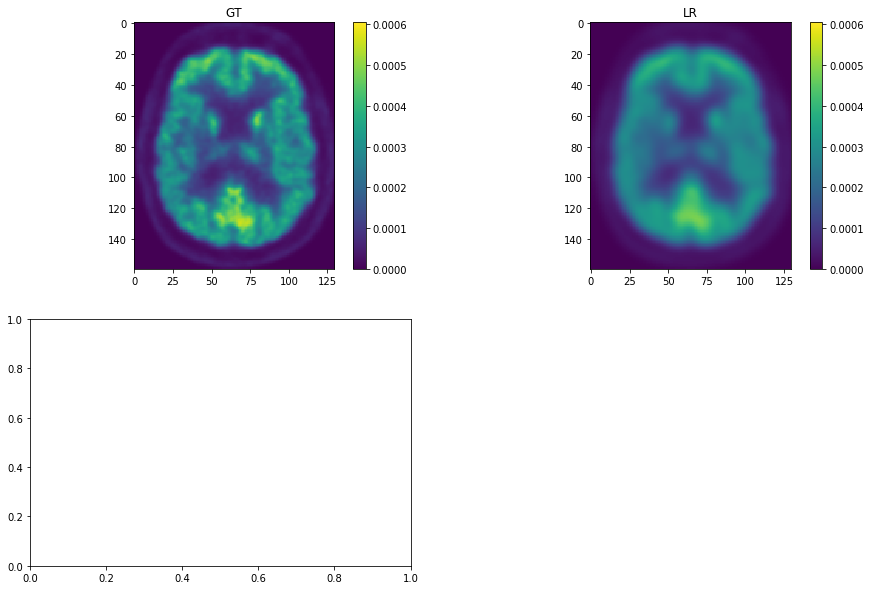

In [5]:
X, pmax, mmax, _ = val.dataset.__getitem__(0)

plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
plt.imshow(np.rot90(np.squeeze(X[4,20:150,5:165].numpy())*pmax,1), cmap='viridis', vmin=0, vmax=pmax)
plt.title('GT')
plt.colorbar()
plt.subplot(2,2,2)
plt.imshow(np.rot90(np.squeeze(X[0,20:150,5:165].numpy())*pmax,1), cmap='viridis', vmin=0, vmax=pmax)
plt.title('LR')
plt.colorbar()
plt.subplot(2,2,3)
plt.imshow(np.rot90(np.squeeze(shallow_SR[0,0,20:150,5:165].cpu().numpy())*pmax,1), cmap='viridis', vmin=0, vmax=pmax)
plt.title('Shallow_SR')
plt.colorbar()
plt.subplot(2,2,4)
plt.imshow(np.rot90(np.squeeze(deep_SR[0,0,20:150,5:165].cpu().numpy())*pmax,1), cmap='viridis', vmin=0, vmax=pmax)
plt.title('Deep_SR')
plt.colorbar()